In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
symbols = ['VZ','BA','FDX','PEP','WMT','GOLD','C','AMZN','JPM', 'WFC', 'XOM','AAPL','MSFT','KO','HPQ','CL','CSCO','INTC','UNH',
           'PG','CVX','HD','TMO','MCD','ABT','DIS','BMY','TXN','COP','ADBE','AMGN','HON','CB','ADI','MMC','EOG','VRTX','MO','REGN',
          'SYK','PGR','NOC']
print(len(symbols))
print(len(set(symbols)))

42
42


In [206]:
start = '2000-01-01'
end = '2022-11-19'
temp = web.DataReader(name='T', data_source='yahoo', start=start, end=end)
temp['Close_1'] = temp.shift(-1)['Close']
temp = temp[['Close','Close_1']]
temp['T_Change'] = temp['Close_1']/temp['Close']
df = pd.DataFrame(data=temp['T_Change'])
for symbol in symbols:
    temp = web.DataReader(name=symbol, data_source='yahoo', start=start, end=end)
    temp['Close_1'] = temp.shift(-1)['Close']
    temp = temp[['Close','Close_1']]
    df[symbol+'_Change'] = temp['Close_1']/temp['Close']
df.to_csv("~\workspace\{}.csv".format('Percent_Change'))

In [207]:
df = df[:-1]

In [208]:
yearly_return = df.mean(axis=0)**252
yearly_return['T_Change'] = yearly_return['T_Change']+0.068
yearly_return['VZ_Change'] = yearly_return['VZ_Change']+0.048
yearly_return['FDX_Change'] = yearly_return['FDX_Change']+0.012
yearly_return['PEP_Change'] = yearly_return['PEP_Change']+0.03
yearly_return['WMT_Change'] = yearly_return['WMT_Change']+0.05
yearly_return['GOLD_Change'] = yearly_return['GOLD_Change']+0.03
yearly_return['C_Change'] = yearly_return['C_Change']+0.035
yearly_return['JPM_Change'] = yearly_return['JPM_Change']+0.03
yearly_return['WFC_Change'] = yearly_return['WFC_Change']+0.028
yearly_return['XOM_Change'] = yearly_return['XOM_Change']+0.045
yearly_return['MSFT_Change'] = yearly_return['MSFT_Change']+0.011
yearly_return['AAPL_Change'] = yearly_return['AAPL_Change']+0.0061
yearly_return['HPQ_Change'] = yearly_return['HPQ_Change']+0.0348
yearly_return['KO_Change'] = yearly_return['KO_Change']+0.0281
yearly_return['CL_Change'] = yearly_return['CL_Change']+0.0245
yearly_return['CSCO_Change'] = yearly_return['CSCO_Change']+0.0314
yearly_return['INTC_Change'] = yearly_return['INTC_Change']+0.0498
yearly_return['UNH_Change'] = yearly_return['UNH_Change']+0.0123
yearly_return['PG_Change'] = yearly_return['PG_Change']+0.0249
yearly_return['CVX_Change'] = yearly_return['CVX_Change']+0.0309
yearly_return['HD_Change'] = yearly_return['HD_Change']+0.0233
yearly_return['TMO_Change'] = yearly_return['TMO_Change']+0.0022
yearly_return['MCD_Change'] = yearly_return['MCD_Change']+0.0221
yearly_return['ABT_Change'] = yearly_return['ABT_Change']+0.0176
yearly_return['DIS_Change'] = yearly_return['DIS_Change']+0.016
yearly_return['BMY_Change'] = yearly_return['BMY_Change']+0.028
yearly_return['TXN_Change'] = yearly_return['TXN_Change']+0.028
yearly_return['COP_Change'] = yearly_return['COP_Change']+0.0409
yearly_return['AMGN_Change'] = yearly_return['AMGN_Change']+0.0273
yearly_return['TXN_Change'] = yearly_return['TXN_Change']+0.028
yearly_return['HON_Change'] = yearly_return['HON_Change']+0.0187
yearly_return['CB_Change'] = yearly_return['CB_Change']+0.0154
yearly_return['ADI_Change'] = yearly_return['ADI_Change']+0.0182
yearly_return['MMC_Change'] = yearly_return['MMC_Change']+0.0137
yearly_return['EOG_Change'] = yearly_return['EOG_Change']+0.0231
yearly_return['MO_Change'] = yearly_return['MO_Change']+0.084
yearly_return['SYK_Change'] = yearly_return['SYK_Change']+0.0119
yearly_return['PGR_Change'] = yearly_return['PGR_Change']+0.003
yearly_return['NOC_Change'] = yearly_return['NOC_Change']+0.0131

In [209]:
stock_std = df.std(axis=0)

In [210]:
yearly_return

T_Change       1.072994
VZ_Change      1.061369
BA_Change      1.134321
FDX_Change     1.133233
PEP_Change     1.126599
WMT_Change     1.114440
GOLD_Change    1.113676
C_Change       1.055725
AMZN_Change    1.306409
JPM_Change     1.151918
WFC_Change     1.144831
XOM_Change     1.128787
AAPL_Change    1.364757
MSFT_Change    1.126844
KO_Change      1.084256
HPQ_Change     1.117799
CL_Change      1.087822
CSCO_Change    1.099401
INTC_Change    1.108272
UNH_Change     1.284420
PG_Change      1.092283
CVX_Change     1.138928
HD_Change      1.144217
TMO_Change     1.221855
MCD_Change     1.139745
ABT_Change     1.134947
DIS_Change     1.119224
BMY_Change     1.077904
TXN_Change     1.195195
COP_Change     1.195312
ADBE_Change    1.250679
AMGN_Change    1.151573
HON_Change     1.131564
CB_Change      1.191396
ADI_Change     1.168765
MMC_Change     1.110120
EOG_Change     1.288847
VRTX_Change    1.318952
MO_Change      1.170937
REGN_Change    1.424668
SYK_Change     1.174060
PGR_Change     1

In [211]:
df_cov = df.cov()

In [212]:
Irf = 0.04
Rm = 0.0987
Rp = None
STDm = 0.01
Ret_Vol = []
Stock_pair = {}
for stock1 in df_cov.columns:
    for stock2 in df_cov.columns:
        progress = 1
        if stock1 in Stock_pair:
            if stock2 in Stock_pair[stock1]:
                progress = 0
            else:
                ex = Stock_pair[stock1]
                ex.append(stock2)
                Stock_pair[stock1] = ex
                if stock2 in Stock_pair:
                    ex = Stock_pair[stock2]
                    ex.append(stock1)
                    Stock_pair[stock2] = ex
                else:
                    Stock_pair[stock2] = [stock1]
        else:
            Stock_pair[stock1] = [stock2]
            if stock2 not in Stock_pair:
                Stock_pair[stock2] = [stock1] 
            else:
                ex = Stock_pair[stock2]
                ex.append(stock1)
                Stock_pair[stock2] = ex
        if stock1!=stock2 and progress==1:
            for i in range(0,100,5):
                i=i/100
                STDp = (i**2*stock_std[stock1]**2+(1-i)**2*stock_std[stock2]**2+i*(1-i)*stock_std[stock1]*stock_std[stock2]*df_cov[stock1][stock2])**0.5
                ReturnP = i*yearly_return[stock1]+(1-i)*yearly_return[stock2]
                STDp = round(STDp,4)
                ReturnP = round(ReturnP,4)
                Ret_Vol.append([STDp,ReturnP,stock1,i,stock2,1-i])

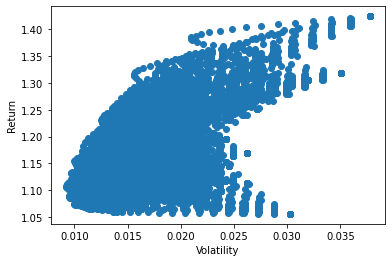

In [230]:
x = []
y = []

for r in Ret_Vol:
    i=r[0]
    j=r[1]
    x.append(i)
    y.append(j)
plt.scatter(x, y)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.savefig("workspace\All_portolios.png")
plt.show()

In [214]:
Ret_vol_df = pd.DataFrame (Ret_Vol,columns=['Volatility','Return','Stock_1','Stock_1_weightage','Stock_2','Stock_2_weightage'])
Ret_vol_df

,Volatility,Return,Stock_1,Stock_1_weightage,Stock_2,Stock_2_weightage
0,0.0152,1.0614,T_Change,0.00,VZ_Change,1.00
1,0.0145,1.0619,T_Change,0.05,VZ_Change,0.95
2,0.0138,1.0625,T_Change,0.10,VZ_Change,0.90
3,0.0132,1.0631,T_Change,0.15,VZ_Change,0.85
4,0.0126,1.0637,T_Change,0.20,VZ_Change,0.80
...,...,...,...,...,...,...
18055,0.0143,1.1944,PGR_Change,0.75,NOC_Change,0.25
18056,0.0149,1.1943,PGR_Change,0.80,NOC_Change,0.20
18057,0.0157,1.1943,PGR_Change,0.85,NOC_Change,0.15
18058,0.0165,1.1943,PGR_Change,0.90,NOC_Change,0.10


In [232]:
Vol_Ret_df = Ret_vol_df[['Volatility','Return']]
max_vol_ret = Vol_Ret_df.groupby(['Volatility'])['Return'].max().reset_index()

In [233]:
max_vol_ret

,Volatility,Return
0,0.0092,1.1075
1,0.0093,1.1112
2,0.0094,1.1129
3,0.0095,1.1146
4,0.0096,1.1130
...,...,...
225,0.0342,1.4141
226,0.0351,1.3190
227,0.0359,1.4217
228,0.0360,1.4194


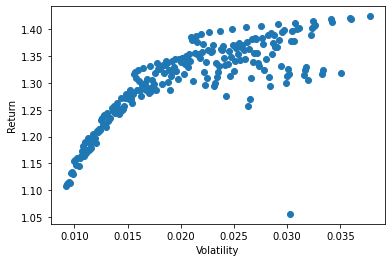

In [234]:
plt.scatter(max_vol_ret['Volatility'], max_vol_ret['Return'])
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.savefig("workspace\Max_Return_Volatilty.png")
plt.show()

In [217]:
max_vol_ret

,Volatility,Return
0,0.0092,1.1075
1,0.0093,1.1112
2,0.0094,1.1129
3,0.0095,1.1146
4,0.0096,1.1130
...,...,...
225,0.0342,1.4141
226,0.0351,1.3190
227,0.0359,1.4217
228,0.0360,1.4194


## Removing portfolios with low Sharpe Ratio


In [238]:
max_vol_ret['Sharpe ratio'] = max_vol_ret['Return']/max_vol_ret['Volatility']

In [239]:
max_vol_ret = max_vol_ret[max_vol_ret['Sharpe ratio']>max_vol_ret['Sharpe ratio'].mean()]

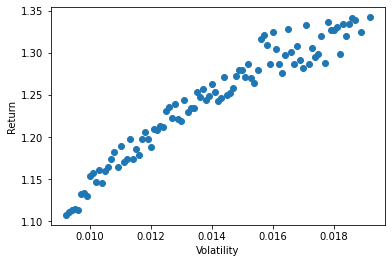

In [243]:
plt.scatter(max_vol_ret['Volatility'], max_vol_ret['Return'])
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.savefig('workspace\\Upper_half_Sharpe_ratio.png')
plt.show()

In [221]:
max_vol_ret

,Volatility,Return,Sharpe ratio
0,0.0092,1.1075,120.380435
1,0.0093,1.1112,119.483871
2,0.0094,1.1129,118.393617
3,0.0095,1.1146,117.326316
4,0.0096,1.1130,115.937500
...,...,...,...
93,0.0185,1.3335,72.081081
94,0.0186,1.3407,72.080645
95,0.0187,1.3382,71.561497
97,0.0189,1.3248,70.095238


In [222]:
Return_portfolios = []
values = Ret_vol_df.values.tolist()
for i in max_vol_ret.values:
    for portfolio in values:
        if i[0] == portfolio[0] and i[1]==portfolio[1]:
            Return_portfolios.append(portfolio)

In [223]:
portfolio_weights_df = pd.DataFrame(Return_portfolios, columns = ['Volatility', 'Return', 'Stock_1', 'Stock_1_weightage', 'Stock_2',
       'Stock_2_weightage'])

In [224]:
portfolio_weights_df

,Volatility,Return,Stock_1,Stock_1_weightage,Stock_2,Stock_2_weightage
0,0.0092,1.1075,PEP_Change,0.55,KO_Change,0.45
1,0.0093,1.1112,PEP_Change,0.55,PG_Change,0.45
2,0.0094,1.1129,PEP_Change,0.60,PG_Change,0.40
3,0.0095,1.1146,PEP_Change,0.65,PG_Change,0.35
4,0.0096,1.1130,PEP_Change,0.65,CL_Change,0.35
...,...,...,...,...,...,...
94,0.0185,1.3335,UNH_Change,0.65,REGN_Change,0.35
95,0.0186,1.3407,AAPL_Change,0.70,UNH_Change,0.30
96,0.0187,1.3382,AAPL_Change,0.65,EOG_Change,0.35
97,0.0189,1.3248,AAPL_Change,0.65,ADBE_Change,0.35


In [225]:
Return_portfolios

[[0.0092, 1.1075, 'PEP_Change', 0.55, 'KO_Change', 0.44999999999999996],
 [0.0093, 1.1112, 'PEP_Change', 0.55, 'PG_Change', 0.44999999999999996],
 [0.0094, 1.1129, 'PEP_Change', 0.6, 'PG_Change', 0.4],
 [0.0095, 1.1146, 'PEP_Change', 0.65, 'PG_Change', 0.35],
 [0.0096, 1.113, 'PEP_Change', 0.65, 'CL_Change', 0.35],
 [0.0097, 1.1325, 'PEP_Change', 0.55, 'MCD_Change', 0.44999999999999996],
 [0.0098, 1.1332, 'PEP_Change', 0.5, 'MCD_Change', 0.5],
 [0.0099, 1.1304, 'PEP_Change', 0.55, 'ABT_Change', 0.44999999999999996],
 [0.01, 1.1538, 'PEP_Change', 0.6, 'NOC_Change', 0.4],
 [0.0101, 1.1572, 'PEP_Change', 0.55, 'NOC_Change', 0.44999999999999996],
 [0.0102, 1.147, 'PEP_Change', 0.7, 'NOC_Change', 0.30000000000000004],
 [0.0103, 1.1606, 'PEP_Change', 0.5, 'NOC_Change', 0.5],
 [0.0104, 1.1456, 'PEP_Change', 0.6, 'SYK_Change', 0.4],
 [0.0105, 1.1599, 'PEP_Change', 0.65, 'TMO_Change', 0.35],
 [0.0106, 1.1647, 'PEP_Change', 0.6, 'TMO_Change', 0.4],
 [0.0107, 1.1739, 'PEP_Change', 0.7, 'UNH_Chang

# Stocks Data on monthly Basis

In [44]:
temp = web.get_data_yahoo('T', start, end, interval='m')
temp['T_Close'] = temp['Close']/temp['Close'].shift(-1)
Monthly_Returns_df = pd.DataFrame(data=temp['T_Close'])
for symbol in symbols:
    temp = web.get_data_yahoo(symbol, start, end, interval='m')
    Monthly_Returns_df[symbol+'_Close'] = temp['Close']/temp['Close'].shift(-1)
Monthly_Returns_df.to_csv("~\workspace\{}.csv".format('Stock_Close'))

In [48]:
Monthly_Returns_df = Monthly_Returns_df[:-1]

In [49]:
mean_returns = Monthly_Returns_df.mean()
cov_matrix = Monthly_Returns_df.cov()
precision_matrix = pd.DataFrame(cov_matrix.T)
kelly_wt = precision_matrix.dot(mean_returns).values

In [50]:
total_wt = sum(kelly_wt)
stock_weight = {}
for i in range(0,42):
    stock_weight[symbols[i]] = [kelly_wt[i]/total_wt]

In [51]:
std_monthly_returns = Monthly_Returns_df.std()

In [52]:
for stock in symbols:
    Monthly_Returns_df[stock] = 

{'VZ': [0.014590766155854393],
 'BA': [0.012884855574734993],
 'FDX': [0.03378613520431959],
 'PEP': [0.025157732918484],
 'WMT': [0.012034126193253919],
 'GOLD': [0.007861848263484437],
 'C': [0.010266176040812952],
 'AMZN': [0.05251367058611038],
 'JPM': [0.036078028759813544],
 'WFC': [0.032387196238278966],
 'XOM': [0.02574226336364035],
 'AAPL': [0.018291871022930686],
 'MSFT': [0.031191845780988763],
 'KO': [0.02260968175822479],
 'HPQ': [0.012583162644008331],
 'CL': [0.0334855917637604],
 'CSCO': [0.0101302854559572],
 'INTC': [0.034106938515808254],
 'UNH': [0.03315248551043069],
 'PG': [0.01682511850201401],
 'CVX': [0.008244327816208404],
 'HD': [0.021505203753330673],
 'TMO': [0.02204076218095956],
 'MCD': [0.022122734454315438],
 'ABT': [0.016222729746687273],
 'DIS': [0.011800437201656105],
 'BMY': [0.028906016677205548],
 'TXN': [0.014138521773134684],
 'COP': [0.03302916539566546],
 'ADBE': [0.02888203379891213],
 'AMGN': [0.03646140790668745],
 'HON': [0.01571692231672

In [53]:
Monthly_Returns_df

,T_Close,VZ_Close,BA_Close,FDX_Close,PEP_Close,WMT_Close,GOLD_Close,C_Close,AMZN_Close,JPM_Close,...,CB_Close,ADI_Close,MMC_Close,EOG_Close,VRTX_Close,MO_Close,REGN_Close,SYK_Close,PGR_Close,NOC_Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1.135762,1.265645,1.204738,1.132379,1.062257,1.123077,1.003831,1.101449,0.937387,1.013344,...,0.989510,0.594595,1.214863,1.040984,0.564544,1.034056,0.217920,1.081197,1.046219,1.108966
2000-02-01,0.896142,0.800614,0.976860,0.900161,0.921147,0.862832,1.039841,0.864301,1.027985,0.913262,...,0.781421,0.976708,0.701416,0.719764,1.551402,0.972892,1.911205,0.838710,0.782251,0.855962
2000-03-01,0.961484,1.018750,0.952756,1.029851,0.950596,1.020316,0.933086,1.014831,1.214043,1.208839,...,0.955614,1.048007,1.119214,0.851759,0.895933,0.948571,1.035011,0.969592,1.162369,0.746914
2000-04-01,1.002861,1.134752,1.016000,1.061620,0.901690,0.960954,0.927586,0.948744,1.142303,0.965690,...,0.888631,0.997565,0.895514,0.765385,0.707276,0.837321,1.401840,0.951240,0.697071,0.924959
2000-05-01,0.992898,1.040590,0.934230,0.934211,0.915612,1.000000,0.997420,1.032158,1.330465,1.080959,...,0.962054,1.013158,1.053860,0.972872,0.701068,0.983529,0.683438,0.864286,1.268581,1.156604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,1.116081,1.098723,0.858201,0.972629,0.952561,0.920712,1.123888,0.886127,0.787032,0.976162,...,1.042091,0.849558,0.946877,0.992987,1.004921,0.952348,1.016229,0.926333,1.010516,0.999311
2022-07-01,1.070696,1.104760,0.994134,1.105688,1.015615,0.996228,1.059933,1.063307,1.064526,1.014332,...,0.997831,1.134825,1.016050,0.916900,0.995209,0.972075,1.001084,1.046540,0.938117,1.001904
2022-08-01,1.143416,1.101132,1.323505,1.419883,1.055188,1.021974,0.958065,1.171346,1.121858,1.088325,...,1.039422,1.087484,1.080916,1.085653,0.973130,1.117385,0.843497,1.013133,1.055417,1.016308
